<a href="https://colab.research.google.com/github/Meave0108/my_work-python-/blob/master/python_HW0318_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x


In [0]:
%tensorflow_version 2.x

ERROR! Session/line number was not unique in database. History logging moved to new session 67


In [0]:
import tensorflow as tf
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 讀入資料__fashion


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

## 數據集內容


<function load_data at 0x7f83b29768c8>


#### Labels

* T-shirt/top -->0
* Trouser -->1
* Pullover -->2
* Dress -->3
* Coat -->4
* Sandal -->5
* Shirt -->6
* Sneaker -->7
* Bag -->8
* Ankle boot -->9






In [0]:
len(x_train)

60000

In [0]:
len(x_test)

10000

正確答案 7


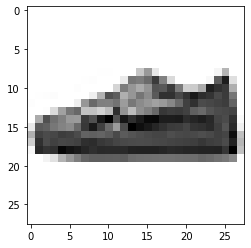

In [0]:
n=108
plt.imshow(x_train[n],cmap='Greys')
print('正確答案',y_train[n])

## 資料整理


In [0]:
x_train=x_train*100/255
x_test=x_test*100/255

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train=x_train.reshape(60000,28*28)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_test=x_test.reshape(10000,28*28)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train[108]
y_train=to_categorical(y_train,10)

In [0]:
y_test=to_categorical(y_test,10)

In [0]:
y_train[108]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model=Sequential()  #開空的函數學習機

In [0]:
model.add(Dense(90,input_dim=784,activation='relu'))

In [0]:
model.add(Dense(90,activation='relu'))

In [0]:
#model.add(Dense(64,activation='relu'))

In [0]:
model.add(Dense(67,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

## 組裝神經網路

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 90)                70650     
_________________________________________________________________
dense_146 (Dense)            (None, 90)                8190      
_________________________________________________________________
dense_147 (Dense)            (None, 67)                6097      
_________________________________________________________________
dense_148 (Dense)            (None, 10)                680       
Total params: 85,617
Trainable params: 85,617
Non-trainable params: 0
_________________________________________________________________


## 訓練神經網路

In [0]:
model.fit(x_train,y_train,batch_size=80,epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0870 - acc: 0.2212
Epoch 2/25
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0693 - acc: 0.4633
Epoch 3/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0496 - acc: 0.6302
Epoch 4/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0418 - acc: 0.7030
Epoch 5/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0374 - acc: 0.7372
Epoch 6/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0346 - acc: 0.7553
Epoch 7/25
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0327 - acc: 0.7689
Epoch 8/25
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0314 - acc: 0.7784
Epoch 9/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0303 - acc: 0.7850
Epoch 10/25
60000/60000 [==============================] - 

## 訓練結果

In [0]:
a=model.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(a, axis=1)

In [0]:
def show_predict(n):
  print('神經網路預測是:',result[n])
  plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

show_predict(2000)

### 檢查是否有overfitting的狀況

In [0]:
loss,accuracy = model.evaluate(x_test, y_test)
print('result')
print(f'loss：{loss}\n acccuracy: {accuracy}')

### 利用混淆矩陣看預測準確度

In [0]:



from sklearn.metrics import confusion_matrix


print (confusion_matrix(y_test_classes,y_pred_classes))

SyntaxError: ignored